In [1]:
from S_Matrix_env import*
from S_Matrix_Train import*
import pandas as pd
from numpy import array, linspace, log10
import matplotlib.pyplot as plt
#%reload_ext tensorboard

In [2]:
def To_Dict(mass, c_coeff):
    return {'m': mass, 'cl': c_coeff}

In [3]:
Constrained_k = [5 + i for i in range(0, 6)]

## Model 1

In [4]:
String_Spec_1 = {
0: [{'m': sqrt(1), 'cl': 1}, {'m': sqrt(2), 'cl': 1/12}, {'m': sqrt(3), 'cl': 7/360}, {'m': sqrt(4), 'cl': 107/15120}, {'m': sqrt(5), 'cl': 5951/1814400}, {'m': sqrt(6), 'cl': 587/332640}],
2: [{'m': sqrt(2), 'cl': 1/6}, {'m': sqrt(3), 'cl': 5/84},  {'m': sqrt(4), 'cl': 13/504}, {'m': sqrt(5), 'cl': 745/57024}],
4: [{'m': sqrt(3), 'cl': 9/280}, {'m': sqrt(4), 'cl': 76/3465}, {'m': sqrt(5), 'cl': 565/41184}],
6: [{'m': sqrt(4), 'cl': 16/2079}, {'m': sqrt(5), 'cl': 3125/399168}, {'m': sqrt(6), 'cl': 3321/523600}],
8: [{'m': sqrt(5), 'cl': 3125/1482624}, {'m': sqrt(6), 'cl': 387/135850}, {'m': sqrt(7), 'cl': 238003927/84509568000}]
}

String_1 = S_Matrix(String_Spec_1, String_Spec_1, Constrained_k)

In [5]:
String_1.data_frame_form()

,m^2 = 1,m^2 = 2,m^2 = 3,m^2 = 4,m^2 = 5,m^2 = 6,m^2 = 7
0,1.0,0.083333,0.019444,0.007077,0.003280,0.001765,NaN
2,NaN,0.166667,0.059524,0.025794,0.013065,NaN,NaN
4,NaN,NaN,0.032143,0.021934,0.013719,NaN,NaN
6,NaN,NaN,NaN,0.007696,0.007829,0.006343,NaN
8,NaN,NaN,NaN,NaN,0.002108,0.002849,0.002816


In [5]:
Random_Spec_1 = {
0: [{'m': sqrt(1), 'cl': 1}, {'m': sqrt(2), 'cl': rand()}, {'m': sqrt(3), 'cl': rand()}, {'m': sqrt(4), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}, {'m': sqrt(6), 'cl': rand()}],
2: [{'m': sqrt(2), 'cl': rand()}, {'m': sqrt(3), 'cl': rand()},  {'m': sqrt(4), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}],
4: [{'m': sqrt(3), 'cl': rand()}, {'m': sqrt(4), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}],
6: [{'m': sqrt(4), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}, {'m': sqrt(6), 'cl': rand()}],
8: [{'m': sqrt(5), 'cl': rand()}, {'m': sqrt(6), 'cl': rand()}, {'m': sqrt(7), 'cl': rand()}]
}

Random_Theory_1 = S_Matrix(Random_Spec_1, Random_Spec_1, Constrained_k)

In [17]:
string_spec = pd.read_csv("String_Spec_1.csv")

new_spec_dict = {}
rand_spec_dict = {}
max_n = 9
max_spin = (max_n - 1) * 2

for spec in string_spec.iloc:
    
    
    if int(spec['Spin']) > max_spin:
        break
    
    if int(spec['Spin']) in new_spec_dict:

        if int(spec['n']) <= max_n:
            new_spec_dict[int(spec['Spin'])] += [To_Dict(sqrt(int(spec['n'])), spec['cl'])]
            rand_spec_dict[int(spec['Spin'])] += [To_Dict(sqrt(int(spec['n'])), rand())]
    
    else:

        if int(spec['n']) <= max_n:
            new_spec_dict[int(spec['Spin'])] = [To_Dict(sqrt(int(spec['n'])), spec['cl'])]
            rand_spec_dict[int(spec['Spin'])] = [To_Dict(sqrt(int(spec['n'])), rand())]
        


##################################################################################################################################################################
String_1_New = S_Matrix(new_spec_dict, new_spec_dict, Constrained_k)
Random_1_New = S_Matrix(rand_spec_dict, rand_spec_dict, Constrained_k)

In [20]:
String_1_New.data_frame_form().values.flatten()

array([1.00000000e+00, 8.33333333e-02, 1.94444444e-02, 7.07671958e-03,
       3.27987213e-03, 1.76467051e-03, 1.04995759e-03, 6.71632723e-04,
       4.53760301e-04,            nan, 1.66666667e-01, 5.95238095e-02,
       2.57936508e-02, 1.30646745e-02, 7.40296740e-03, 4.55445885e-03,
       2.98186415e-03, 2.04918517e-03,            nan,            nan,
       3.21428571e-02, 2.19336219e-02, 1.37189200e-02, 8.78746254e-03,
       5.85421757e-03, 4.05160610e-03, 2.90003394e-03,            nan,
                  nan,            nan, 7.69600770e-03, 7.82878387e-03,
       6.34262796e-03, 4.86925401e-03, 3.70714095e-03, 2.84168633e-03,
                  nan,            nan,            nan,            nan,
       2.10774950e-03, 2.84873022e-03, 2.81629563e-03, 2.50521158e-03,
       2.13617951e-03,            nan,            nan,            nan,
                  nan,            nan, 6.31319145e-04, 1.06247562e-03,
       1.23484097e-03, 1.24396061e-03,            nan,            nan,
      

In [41]:
acc_spec = pd.read_csv("Acc_Spec_1.csv")

acc_spec_dict = {}
max_spin = 800
max_n = 400

for spec in acc_spec.iloc:
    
    
    if int(spec['Spin']) > max_spin:
        break
    
    if int(spec['Spin']) in acc_spec_dict:

        if int(spec['n']) <= max_n:
            acc_spec_dict[int(spec['Spin'])] += [To_Dict(sqrt(int(spec['n'])), spec['cl'])]
    
    else:

        if int(spec['n']) <= max_n:
            acc_spec_dict[int(spec['Spin'])] = [To_Dict(sqrt(int(spec['n'])), spec['cl'])]

##################################################################################################################################################################
Accumulation = S_Matrix(acc_spec_dict, acc_spec_dict, Constrained_k)

In [45]:
Accumulation.Spec_List_to_Spec_Dict()[0]
#Accumulation.Reward()

{0: [{'m': 1.0, 'cl': 0.4620981203732968}],
 2: [{'m': 1.0, 'cl': 0.0363778242642967}],
 4: [{'m': 1.0, 'cl': 0.0014697584546659}],
 6: [{'m': 1.0, 'cl': 5.24623526817e-05}],
 8: [{'m': 1.0, 'cl': 1.7743950485399288e-06}],
 10: [{'m': 1.0, 'cl': 5.8224737589577044e-08}],
 12: [{'m': 1.0, 'cl': 1.873845724893304e-09}],
 14: [{'m': 1.0, 'cl': 5.949631319445485e-11}],
 16: [{'m': 1.0, 'cl': 1.870350734139596e-12}],
 18: [{'m': 1.0, 'cl': 5.834974854399802e-14}],
 20: [{'m': 1.0, 'cl': 1.809377438598788e-15}],
 22: [{'m': 1.0, 'cl': 5.583275867348447e-17}],
 24: [{'m': 1.0, 'cl': 1.7158764269775588e-18}],
 26: [{'m': 1.0, 'cl': 5.2553268306756595e-20}],
 28: [{'m': 1.0, 'cl': 1.604901262529405e-21}],
 30: [{'m': 1.0, 'cl': 4.888831040725933e-23}],
 32: [{'m': 1.0, 'cl': 1.4859691598715944e-24}],
 34: [{'m': 1.0, 'cl': 4.5079311290316444e-26}],
 36: [{'m': 1.0, 'cl': 1.3652197660253171e-27}],
 38: [{'m': 1.0, 'cl': 4.128244911379336e-29}],
 40: [{'m': 1.0, 'cl': 1.2466183005023509e-30}],
 4

In [501]:
#print(String_1_New.Spec_List_to_Spec_Dict())
print(String_1_New.Reward())

-0.0185869267022984


In [358]:
print(String_1.Reward(), Random_Theory_1.Reward(), String_1_New.Reward(), Random_1_New.Reward())

-0.008007134705271361 -1.0263400474452546 -0.0 -0.0


In [280]:
print(String_1.Reward())
print(Random_Theory_1.Reward())

-0.008007134705271361
-1.0263400474452546


### Convergence Test 1 (2D Plot)

In [7]:
def n_s_Reward(n, s, spec_df, Constraint_k = Constrained_k):

    tmp_spec_dict = {}

    max_spin = s
    max_n = n

    for spec in spec_df.iloc:
        
        
        if int(spec['Spin']) > max_spin:
            break
        
        if int(spec['Spin']) in tmp_spec_dict:

            if int(spec['n']) <= max_n:
                tmp_spec_dict[int(spec['Spin'])] += [To_Dict(sqrt(int(spec['n'])), spec['cl'])]
        
        else:

            if int(spec['n']) <= max_n:
                tmp_spec_dict[int(spec['Spin'])] = [To_Dict(sqrt(int(spec['n'])), spec['cl'])]
    
    Theory = S_Matrix(tmp_spec_dict, tmp_spec_dict, Constrained_k)
    
    return Theory.Reward()

In [508]:
n_max_list = [n for n in range(2, 31)]
s_max_list = [s for s in range(2, 31, 2)]
reward_list = [[n_s_Reward(n, spin, string_spec) for n in n_max_list] for spin in s_max_list]
pts_list = [ [n, spin] for n in n_max_list for spin in s_max_list]

In [514]:
spin = linspace(2, 30, 100)
mass_squared = spin/2 + 1

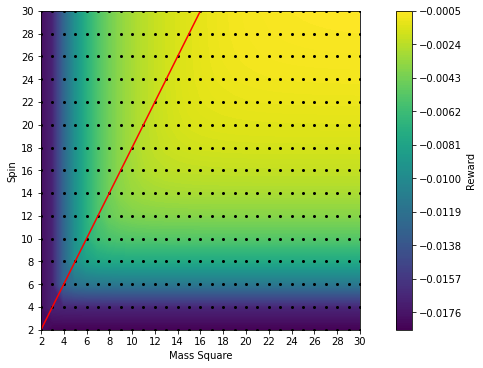

In [518]:
fig, ax = plt.subplots(constrained_layout=True)
data = ax.contourf(n_max_list, s_max_list, reward_list, levels = 200)
N, S = array(pts_list).T
ax.plot(N, S, 'ok', ms = 2)
plt.xticks(n_max_list[::2])
plt.yticks(s_max_list)
plt.plot(mass_squared, spin, 'r')
#ax.set_title('Crossing')
ax.set_xlabel('Mass Square')
ax.set_ylabel('Spin')
ax.set_aspect(1)
label_bar = fig.colorbar(data)
label_bar.ax.set_ylabel('Reward')
plt.rcParams["figure.figsize"] = (12, 8)
plt.show()

### Convergence Test 2 (1D Plot)

In [8]:
n_max_list_1D = [n for n in range(2, 101)]
s_max_list_1D = [int( 2 * (n - 1) ) for n in n_max_list_1D]
reward_list_1D = array([n_s_Reward(n, int( 2 * (n - 1) ), string_spec) for n in n_max_list_1D])

NameError: name 'string_spec' is not defined

In [18]:
reward_list_1D_2 = array([n_s_Reward(n, int( 2 * (n - 1) ), string_spec, [5 + i for i in range(0, 26)]) for n in n_max_list_1D])

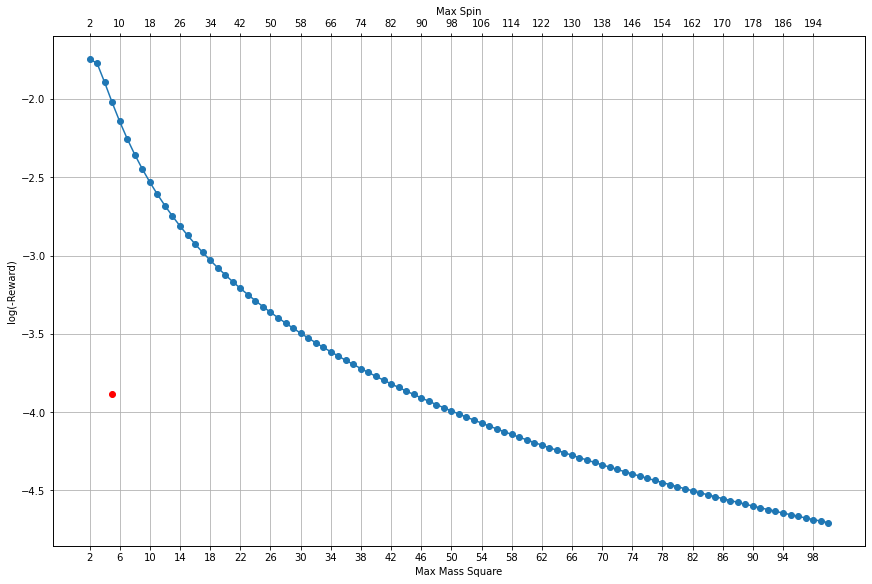

In [20]:
fig2, ax_2 = plt.subplots(constrained_layout=True)

ax_2.plot(n_max_list_1D, np.log10(-reward_list_1D), '-o')
ax_2.plot(5, log10(0.00013114670915347613), 'or')
ax_2.grid(True)
ax_2.set_xlabel('Max Mass Square')
ax_2.set_ylabel('log(-Reward)')
ax_2.set_xticks(n_max_list_1D[::4])

ax_s = ax_2.twiny()
ax_s.set_xticks(ax_2.get_xticks())
ax_s.set_xbound(ax_2.get_xbound())
ax_s.set_xticklabels(2 * (array(n_max_list_1D[::4]) - 1))
ax_s.set_xlabel('Max Spin')


plt.rcParams["figure.figsize"] = (20, 10)

plt.show()

### Convergence Test 3 (1D Plot)

In [21]:
n_max_list_1D = [n for n in range(2, 101)]
s_max_list_1D = [int( 2 * (n - 1) ) for n in n_max_list_1D]
reward_list_1D = array([n_s_Reward(n, int( 2 * (n - 1) ), string_spec) for n in n_max_list_1D])

In [22]:
reward_list_1D_2 = array([n_s_Reward(n, int( 2 * (n - 1) ), string_spec, [5 + i for i in range(0, 26)]) for n in n_max_list_1D])

In [48]:
acc_reward_list_1D_2 = array([n_s_Reward(1, s, acc_spec, [5 + i for i in range(0, 26)]) for s in s_max_list_1D])

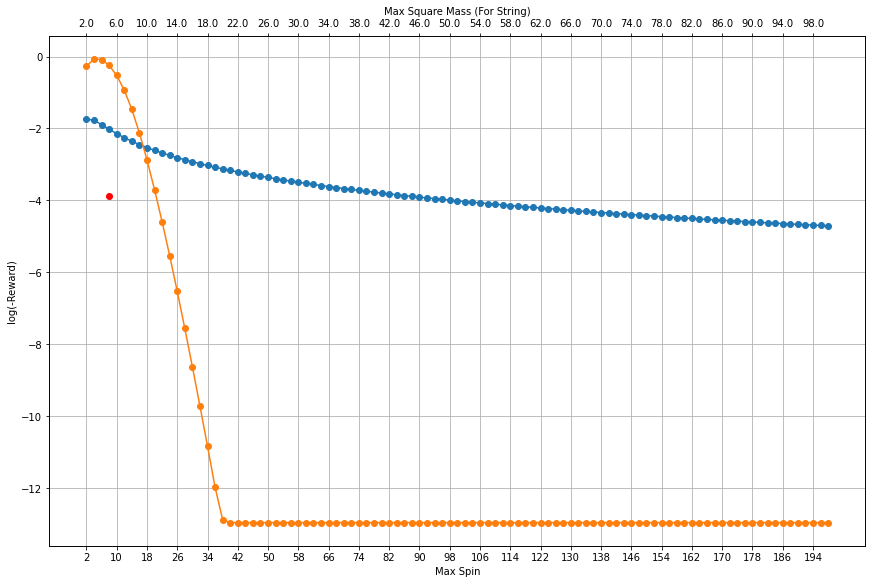

In [51]:
fig2, ax_2 = plt.subplots(constrained_layout=True)

ax_2.plot(s_max_list_1D, np.log10(-reward_list_1D), '-o')
ax_2.plot(s_max_list_1D, np.log10(-acc_reward_list_1D_2), '-o')
ax_2.plot(8, log10(0.00013114670915347613), 'or')
ax_2.grid(True)
ax_2.set_xlabel('Max Spin')
ax_2.set_ylabel('log(-Reward)')
ax_2.set_xticks(s_max_list_1D[::4])

ax_s = ax_2.twiny()
ax_s.set_xticks(ax_2.get_xticks())
ax_s.set_xbound(ax_2.get_xbound())
ax_s.set_xticklabels(1 + array(s_max_list_1D[::4])/2)
ax_s.set_xlabel('Max Square Mass (For String)')


plt.rcParams["figure.figsize"] = (12, 8)

plt.show()

### Training

In [256]:
String_1_New.Full_Spec[0:2]

array([1., 1.])

In [7]:
class TensorboardCallback(BaseCallback):
    """
    Custom callback for plotting additional values in tensorboard.
    """

    def __init__(self, verbose=0):
        super(TensorboardCallback, self).__init__(verbose)

    def _on_step(self) -> bool:
        # Log scalar value (here a random variable)
        value = np.random.random()
        self.logger.record('random_value', value)
        return True


In [14]:
guess_steps = 500
total_steps = 5000
trapped = 50

reward_scale = 0.005

#mask = np.ones(10)
#mask[::2] = 0.
freeze_Id = array([1.] * Random_Theory_1.dim)
freeze_Id[::2] = 0.
freeze_Id[1] = 0

initial_state = Random_Theory_1.Full_Spec

search_sizes = array([1.] * Random_Theory_1.dim)
search_sizes[::2] = 0.

state_min = [ (0 if i % 2 == 1 else - inf) for i in range(Random_Theory_1.dim) ]
state_max = [ (1 if i % 2 == 1 else + inf) for i in range(Random_Theory_1.dim) ]


In [ ]:
env = Training_Env_New(
             Random_Theory_1, freeze_Id,
             min_state_bound = state_min, max_state_bound = state_max,
             guess_mode_steps = guess_steps, trapped_steps = trapped, 
             reward_scale=reward_scale, guess_size=search_sizes, print_interval = 100
             )

log_dir = "tmp/gym/String"
os.makedirs(log_dir, exist_ok = True)
#monitor = Monitor(env, log_dir)
#model = SAC(MlpPolicy, monitor, verbose = 1, device = 'cuda', tensorboard_log="./String_tensorboard/")
#model.learn(total_timesteps = total_steps, log_interval = 100)
model = SAC(MlpPolicy, env, verbose = 1, device = 'cuda', tensorboard_log="./String_tensorboard/")
model.learn(total_timesteps = total_steps)


In [13]:
%reload_ext tensorboard
!tensorboard --logdir ./String_tensorboard


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

I1229 14:38:19.841605 123145454428160 plugin.py:346] Monitor runs begin
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.7.0 at http://localhost:6007/ (Press CTRL+C to quit)
^C


## Model 2

In [52]:
String_Spec_2 = {
0: [{'m': 1, 'cl': 1}, {'m': sqrt(3), 'cl': 1/12}, {'m': sqrt(5), 'cl': 19/720}, {'m': sqrt(7), 'cl': 751/60480}, {'m': 3, 'cl': 2857/403200}],
1: [{'m': sqrt(2), 'cl': 1/2}, {'m': sqrt(4), 'cl': 7/60}, {'m': sqrt(6), 'cl': 41/840}, {'m': sqrt(8), 'cl': 989/37800}, {'m': sqrt(10), 'cl': 16067/997920}],
2: [{'m': sqrt(3), 'cl': 1/4}, {'m': sqrt(5), 'cl': 25/252}, {'m': sqrt(7), 'cl': 49/960}, {'m': sqrt(9), 'cl': 4517/147840}],
3: [{'m': sqrt(4), 'cl': 2/15}, {'m': sqrt(6), 'cl': 3/40}, {'m': sqrt(8), 'cl': 1013/22275}, {'m': sqrt(10), 'cl': 58295/1945944}],
4: [{'m': sqrt(5), 'cl': 25/336}, {'m': sqrt(7), 'cl': 343/6336}, {'m': sqrt(9), 'cl': 7533/200200}],
5: [{'m': sqrt(6), 'cl': 3/70}, {'m': sqrt(8), 'cl': 1408/36855}, {'m': sqrt(10), 'cl': 1625/54432}],
}
String_2 = S_Matrix(String_Spec_2, String_Spec_2, Constrained_k, u_channel = False)

In [59]:
Random_Spec_2 = {
0: [{"m": sqrt(1), 'cl': 1}, {'m': sqrt(3), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}, {'m': sqrt(7), 'cl': rand()}, {'m': 3, 'cl': rand()}],
1: [{"m": sqrt(2), 'cl': rand()}, {'m': sqrt(4), 'cl': rand()}, {'m': sqrt(6), 'cl': rand()}, {'m': sqrt(8), 'cl': rand()}, {'m': sqrt(10), 'cl': rand()}],
2: [{"m": sqrt(3), 'cl': rand()}, {'m': sqrt(5), 'cl': rand()}, {'m': sqrt(7), 'cl': rand()}, {'m': sqrt(9), 'cl': rand()}],
3: [{"m": sqrt(4), 'cl': rand()}, {'m': sqrt(6), 'cl': rand()}, {'m': sqrt(8), 'cl': rand()}, {'m': sqrt(10), 'cl': rand()}],
4: [{"m": sqrt(5), 'cl': rand()}, {'m': sqrt(7), 'cl': rand()}, {'m': sqrt(9), 'cl': rand()}],
5: [{"m": sqrt(6), 'cl': rand()}, {'m': sqrt(8), 'cl': rand()}, {'m': sqrt(10), 'cl': rand()}],
}
Random_Theory_2 = S_Matrix(Random_Spec_2, Random_Spec_2, Constrained_k, u_channel = False)

In [69]:
print(String_2.s_kq_Coeff(5, ))

-0.0038356787638883496


In [60]:
print(String_2.Crossing() - Random_Theory_2.Crossing())
print(Random_Theory_2.Crossing())

[-7.24960718e-09 -2.80612084e-07  3.71176380e-03 -5.17568343e-04
 -1.19635373e-09 -4.08873588e-06 -5.81041480e-07 -6.81172963e-06
 -8.80256275e-07 -1.97905271e-10 -9.74755622e-09 -4.36212107e-08
 -9.98832181e-09 -1.93951395e-07 -1.94875567e-05 -4.40706010e-08
 -7.31302048e-06 -1.10757982e-04 -8.53418101e-05 -5.27705573e-08
 -2.02042656e-06 -5.20339570e-08 -2.12024542e-04  0.00000000e+00
 -1.72765673e-07 -1.84248045e-09 -2.77304399e-05 -1.53092273e-06
 -4.04208189e-04  0.00000000e+00]
[ 8.09478013e-09  3.15001200e-07 -1.91707786e-03  1.41170149e-03
  1.33643606e-09  5.01490975e-06  1.58839168e-06  7.64172966e-06
  1.09449129e-06  2.21156102e-10  1.09567979e-08  5.56040380e-08
  1.28696892e-08  2.44296178e-07  2.35699230e-05  4.91796721e-08
  1.69184782e-05  2.07288974e-04  1.02611986e-04  1.61297669e-07
  5.11692516e-06  5.84537036e-08  2.65753357e-04  0.00000000e+00
  5.02627796e-07  2.07208518e-09  5.79093053e-05  1.71700157e-06
  7.13764953e-04  0.00000000e+00]


In [61]:
print(String_2.Reward())
print(Random_Theory_2.Reward())

-0.0020321743090223206
-0.002511171819580318
